In [1]:
# Table 1 -   Survive and Not-survive

In [2]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")

# Inputing constraint in the dataset 

# Positive case:

df = df[df['PCR_SARS2']==1]
print(df.shape)


# Hospitalized people:

df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1]
print(df.shape)

# Hospitalized people with age small than 110:

df = df[df['PCR_SARS2']==1][df['HOSPITAL']==1][df['NU_IDADE_N']<=110][df['EVOLUCAO'] != 3][df['EVOLUCAO'] != 9][df['EVOLUCAO'].notnull()]
print(df.shape)


/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(299142, 154)
(279987, 154)


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(242679, 154)


In [4]:
print(df['EVOLUCAO'].value_counts())

1.0    151091
2.0     91588
Name: EVOLUCAO, dtype: int64


In [5]:
# IDHM

# Reading IBGE code for each municipalities and separating it for IDHM index

df_atlas = pd.read_excel (r'/home/pedro/Desktop/code/dataset/AtlasBrasil_Consulta.xlsx')


# removind last interger in 'code' variable

df_atlas['code'] = df_atlas['code'].astype(str).str[:-1].astype(np.int64)


# Divinding IDHM in bins

IDHM_veryhigh  =  set(df_atlas['code'][df_atlas['IDHM2010']>=0.800])
print(len(IDHM_veryhigh))


IDHM_high  =  set(df_atlas['code'][((df_atlas['IDHM2010']>=0.700)&(df_atlas['IDHM2010']<0.800))])
print(len(IDHM_high))


IDHM_medium_low  =  set(df_atlas['code'][df_atlas['IDHM2010']<0.700])
print(len(IDHM_medium_low))



df.loc[df['CO_MUN_NOT'].isin(IDHM_veryhigh) == True, 'IDHM'] = 3
df.loc[df['CO_MUN_NOT'].isin(IDHM_high) == True, 'IDHM'] = 2
df.loc[df['CO_MUN_NOT'].isin(IDHM_medium_low) == True, 'IDHM'] = 1


# Municipalities number analysed
print(df['IDHM'].isnull().sum())


44
1890
3632
6


In [6]:
# Private and public hospital separation

df_hospital = pd.read_csv('/home/pedro/Desktop/code/dataset/CNES_SUS.txt', sep='\t')


public   =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='S'])
private  =  set(df_hospital.iloc[:,0][df_hospital.iloc[:,3]=='N'])


df.loc[df['CO_UNI_NOT'].isin(public) == True, 'HEALTH_SYSTEM'] = 1
df.loc[df['CO_UNI_NOT'].isin(private) == True, 'HEALTH_SYSTEM'] = 0

In [7]:
# Constraint on dataset: We only analyze people with  evolution, IDHM and Health system known

df = df[df['IDHM'].notnull()][(df['HEALTH_SYSTEM']==1)|(df['HEALTH_SYSTEM']==0)]
print(df.shape)


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(231112, 156)


In [8]:
# Number Municipalities 

print(df['CO_UNI_NOT'].nunique())
print(df['CO_MUN_NOT'].nunique())


3991
1801


In [9]:
# Evolution numbers

print(df['EVOLUCAO'].value_counts())
print(100*df['EVOLUCAO'].value_counts()/df['EVOLUCAO'].notnull().sum())
print(df['EVOLUCAO'].isna().sum())

1.0    143889
2.0     87223
Name: EVOLUCAO, dtype: int64
1.0    62.259424
2.0    37.740576
Name: EVOLUCAO, dtype: float64
0


In [10]:
# Health System division 

print(df['HEALTH_SYSTEM'].value_counts())
print(df['HEALTH_SYSTEM'].shape)

1.0    183134
0.0     47978
Name: HEALTH_SYSTEM, dtype: int64
(231112,)


In [11]:
# Public Health System (Hospital)

print(df['EVOLUCAO'][df['HEALTH_SYSTEM'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['HEALTH_SYSTEM'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['HEALTH_SYSTEM']==1].value_counts()/df['EVOLUCAO'][df['HEALTH_SYSTEM'] == 1].notnull().sum())


183134
1.0    108059
2.0     75075
Name: EVOLUCAO, dtype: int64
1.0    59.005428
2.0    40.994572
Name: EVOLUCAO, dtype: float64


In [12]:
# Private Health System (Hospital)

print(df['EVOLUCAO'][df['HEALTH_SYSTEM'] ==0].notnull().sum())
print(df['EVOLUCAO'][df['HEALTH_SYSTEM'] ==0].value_counts())


print(100*df['EVOLUCAO'][df['HEALTH_SYSTEM']==0].value_counts()/df['EVOLUCAO'][df['HEALTH_SYSTEM'] == 0].notnull().sum())


47978
1.0    35830
2.0    12148
Name: EVOLUCAO, dtype: int64
1.0    74.680062
2.0    25.319938
Name: EVOLUCAO, dtype: float64


In [13]:
# Public Health System (ICU)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1) & (df['UTI'] ==1))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1) & (df['UTI'] ==1))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==1)& (df['UTI'] ==1))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 1)& (df['UTI'] ==1))].notnull().sum() )


60799
2.0    39253
1.0    21546
Name: EVOLUCAO, dtype: int64
2.0    64.561917
1.0    35.438083
Name: EVOLUCAO, dtype: float64


In [14]:
# Private Health System (ICU)

print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0)& (df['UTI'] ==1))].notnull().sum())
print(df['EVOLUCAO'][((df['HEALTH_SYSTEM'] ==0)& (df['UTI'] ==1))].value_counts())


print(100*df['EVOLUCAO'][((df['HEALTH_SYSTEM']==0)&(df['UTI']==1))].value_counts()/df['EVOLUCAO'][((df['HEALTH_SYSTEM'] == 0)& (df['UTI'] ==1))].notnull().sum() )



18651
1.0    10477
2.0     8174
Name: EVOLUCAO, dtype: int64
1.0    56.173932
2.0    43.826068
Name: EVOLUCAO, dtype: float64


In [15]:
# IDHM Very High

print(df['EVOLUCAO'][df['IDHM']==3].notnull().sum())
print(df['EVOLUCAO'][df['IDHM']==3].value_counts())


print(100*df['EVOLUCAO'][df['IDHM'] ==3].value_counts()/df['EVOLUCAO'][df['IDHM']==3].notnull().sum())


91318
1.0    63888
2.0    27430
Name: EVOLUCAO, dtype: int64
1.0    69.96211
2.0    30.03789
Name: EVOLUCAO, dtype: float64


In [16]:
# IDHM High

print(df['EVOLUCAO'][df['IDHM'] ==2].notnull().sum())
print(df['EVOLUCAO'][df['IDHM'] ==2].value_counts())


print(100*df['EVOLUCAO'][df['IDHM'] ==2].value_counts()/df['EVOLUCAO'][df['IDHM'] == 2].notnull().sum() )


124209
1.0    72657
2.0    51552
Name: EVOLUCAO, dtype: int64
1.0    58.495761
2.0    41.504239
Name: EVOLUCAO, dtype: float64


In [17]:
# IDHM Medium_low

print(df['EVOLUCAO'][df['IDHM'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['IDHM'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['IDHM'] ==1].value_counts()/df['EVOLUCAO'][df['IDHM'] == 1].notnull().sum())


15585
2.0    8241
1.0    7344
Name: EVOLUCAO, dtype: int64
2.0    52.877767
1.0    47.122233
Name: EVOLUCAO, dtype: float64


In [18]:
# mean age

#Cured people
print(df['NU_IDADE_N'][df['EVOLUCAO']==1].mean())

# Died people
print(df['NU_IDADE_N'][df['EVOLUCAO']==2].mean())

54.30914802382392
68.56126251103494


In [19]:
# std age

#Cured people
print(df['NU_IDADE_N'][df['EVOLUCAO']==1].std())

# Died people
print(df['NU_IDADE_N'][df['EVOLUCAO']==2].std())

17.704205072269268
15.542750934820731


In [20]:
# Female

print(df['EVOLUCAO'][df['CS_SEXO'] == 'F'].value_counts())
print(df['EVOLUCAO'][df['CS_SEXO'] == 'F'].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_SEXO'] == 'F'].value_counts()/df['EVOLUCAO'][df['CS_SEXO'] == 'F'].notnull().sum())

# 1- Cured  2- Died

1.0    63919
2.0    36700
Name: EVOLUCAO, dtype: int64
100619
1.0    63.525775
2.0    36.474225
Name: EVOLUCAO, dtype: float64


In [21]:
# Male

print(df['EVOLUCAO'][df['CS_SEXO'] == 'M'].value_counts())
print(df['EVOLUCAO'][df['CS_SEXO'] == 'M'].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_SEXO'] == 'M'].value_counts()/df['EVOLUCAO'][df['CS_SEXO'] == 'M'].notnull().sum())

# 1- Cured  2- Died

1.0    79941
2.0    50511
Name: EVOLUCAO, dtype: int64
130452
1.0    61.280011
2.0    38.719989
Name: EVOLUCAO, dtype: float64


In [22]:
# Color
 
# Branca, Preta, Amarela, Parda and Indígena

In [23]:

# Branca

print(df['EVOLUCAO'][df['CS_RACA'] == 1].value_counts())
print(df['EVOLUCAO'][df['CS_RACA'] == 1].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_RACA'] == 1].value_counts()/df['EVOLUCAO'][df['CS_RACA'] == 1].notnull().sum())


# 1- Cured  2- Died (Evolution)

1.0    55040
2.0    30874
Name: EVOLUCAO, dtype: int64
85914
1.0    64.064064
2.0    35.935936
Name: EVOLUCAO, dtype: float64


In [24]:
# Preta

print(df['EVOLUCAO'][df['CS_RACA'] == 2].value_counts())
print(df['EVOLUCAO'][df['CS_RACA'] == 2].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_RACA'] == 2].value_counts()/df['EVOLUCAO'][df['CS_RACA'] == 2].notnull().sum())


1.0    6585
2.0    4871
Name: EVOLUCAO, dtype: int64
11456
1.0    57.480796
2.0    42.519204
Name: EVOLUCAO, dtype: float64


In [25]:
# Amarela

print(df['EVOLUCAO'][df['CS_RACA'] == 3].value_counts())
print(df['EVOLUCAO'][df['CS_RACA'] == 3].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_RACA'] == 3].value_counts()/df['EVOLUCAO'][df['CS_RACA'] == 3].notnull().sum())


1.0    1521
2.0    1005
Name: EVOLUCAO, dtype: int64
2526
1.0    60.213777
2.0    39.786223
Name: EVOLUCAO, dtype: float64


In [26]:
# Parda

print(df['EVOLUCAO'][df['CS_RACA'] == 4].value_counts())
print(df['EVOLUCAO'][df['CS_RACA'] == 4].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_RACA'] == 4].value_counts()/df['EVOLUCAO'][df['CS_RACA'] == 4].notnull().sum())


1.0    38700
2.0    29205
Name: EVOLUCAO, dtype: int64
67905
1.0    56.991385
2.0    43.008615
Name: EVOLUCAO, dtype: float64


In [27]:
# Indígena

print(df['EVOLUCAO'][df['CS_RACA'] == 5].value_counts())
print(df['EVOLUCAO'][df['CS_RACA'] == 5].notnull().sum())

print(100*df['EVOLUCAO'][df['CS_RACA'] == 5].value_counts()/df['EVOLUCAO'][df['CS_RACA'] == 5].notnull().sum())


1.0    280
2.0    215
Name: EVOLUCAO, dtype: int64
495
1.0    56.565657
2.0    43.434343
Name: EVOLUCAO, dtype: float64


In [28]:
# Disease Analysis

In [29]:
# Cardiovascular disease

print(df['EVOLUCAO'][df['CARDIOPATI'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['CARDIOPATI'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['CARDIOPATI'] == 1].value_counts()/df['EVOLUCAO'][df['CARDIOPATI'] == 1].notnull().sum())

# 1- Cured  2- Died

81051
1.0    43068
2.0    37983
Name: EVOLUCAO, dtype: int64
1.0    53.136914
2.0    46.863086
Name: EVOLUCAO, dtype: float64


In [30]:
# Asthma

print(df['EVOLUCAO'][df['ASMA'] ==1].value_counts())
print(df['EVOLUCAO'][df['ASMA'] ==1].notnull().sum())

print(100*df['EVOLUCAO'][df['ASMA'] == 1].value_counts()/df['EVOLUCAO'][df['ASMA'] == 1].notnull().sum())


1.0    4453
2.0    2021
Name: EVOLUCAO, dtype: int64
6474
1.0    68.782824
2.0    31.217176
Name: EVOLUCAO, dtype: float64


In [31]:
# Diabetes

print(df['EVOLUCAO'][df['DIABETES'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['DIABETES'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['DIABETES'] == 1].value_counts()/df['EVOLUCAO'][df['DIABETES'] == 1].notnull().sum())


60765
1.0    31719
2.0    29046
Name: EVOLUCAO, dtype: int64
1.0    52.199457
2.0    47.800543
Name: EVOLUCAO, dtype: float64


In [32]:
# Pulmonary disease

print(df['EVOLUCAO'][df['PNEUMOPATI'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['PNEUMOPATI'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['PNEUMOPATI'] == 1].value_counts()/df['EVOLUCAO'][df['PNEUMOPATI'] == 1].notnull().sum())


9507
2.0    5500
1.0    4007
Name: EVOLUCAO, dtype: int64
2.0    57.852109
1.0    42.147891
Name: EVOLUCAO, dtype: float64


In [33]:
# Obesity

print(df['EVOLUCAO'][df['OBESIDADE'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['OBESIDADE'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['OBESIDADE'] ==1].value_counts()/df['EVOLUCAO'][df['OBESIDADE'] == 1].notnull().sum())


12131
1.0    7161
2.0    4970
Name: EVOLUCAO, dtype: int64
1.0    59.030583
2.0    40.969417
Name: EVOLUCAO, dtype: float64


In [34]:
# Immunosuppression

print(df['EVOLUCAO'][df['IMUNODEPRE'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['IMUNODEPRE'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['IMUNODEPRE'] ==1].value_counts()/df['EVOLUCAO'][df['IMUNODEPRE'] == 1].notnull().sum())


7202
2.0    3795
1.0    3407
Name: EVOLUCAO, dtype: int64
2.0    52.693696
1.0    47.306304
Name: EVOLUCAO, dtype: float64


In [35]:
# Renal disease 

print(df['EVOLUCAO'][df['RENAL'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['RENAL'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['RENAL'] ==1].value_counts()/df['EVOLUCAO'][df['RENAL'] == 1].notnull().sum())


10744
2.0    6632
1.0    4112
Name: EVOLUCAO, dtype: int64
2.0    61.727476
1.0    38.272524
Name: EVOLUCAO, dtype: float64


In [36]:
# Liver disease
 

print(df['EVOLUCAO'][df['HEPATICA'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['HEPATICA'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['HEPATICA'] ==1].value_counts()/df['EVOLUCAO'][df['HEPATICA'] == 1].notnull().sum())


2302
2.0    1377
1.0     925
Name: EVOLUCAO, dtype: int64
2.0    59.81755
1.0    40.18245
Name: EVOLUCAO, dtype: float64


In [37]:
# Neurological disease

print(df['EVOLUCAO'][df['NEUROLOGIC'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['NEUROLOGIC'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['NEUROLOGIC']==1].value_counts()/df['EVOLUCAO'][df['NEUROLOGIC'] == 1].notnull().sum())


9973
2.0    6068
1.0    3905
Name: EVOLUCAO, dtype: int64
2.0    60.84428
1.0    39.15572
Name: EVOLUCAO, dtype: float64


In [38]:
# Hematological disease

print(df['EVOLUCAO'][df['HEMATOLOGI'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['HEMATOLOGI'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['HEMATOLOGI'] ==1].value_counts()/df['EVOLUCAO'][df['HEMATOLOGI'] == 1].notnull().sum())


2089
1.0    1054
2.0    1035
Name: EVOLUCAO, dtype: int64
1.0    50.454763
2.0    49.545237
Name: EVOLUCAO, dtype: float64


In [39]:
# Other disease

print(df['EVOLUCAO'][df['OUT_MORBI'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['OUT_MORBI'] ==1].value_counts())

print(100*df['EVOLUCAO'][df['OUT_MORBI'] ==1].value_counts()/df['EVOLUCAO'][df['OUT_MORBI'] == 1].notnull().sum())


65996
1.0    35395
2.0    30601
Name: EVOLUCAO, dtype: int64
1.0    53.632038
2.0    46.367962
Name: EVOLUCAO, dtype: float64


In [40]:
# Fever

print(df['EVOLUCAO'][df['FEBRE'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['FEBRE'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['FEBRE'] ==1].value_counts()/df['EVOLUCAO'][df['FEBRE'] == 1].notnull().sum())


153153
1.0    99656
2.0    53497
Name: EVOLUCAO, dtype: int64
1.0    65.069571
2.0    34.930429
Name: EVOLUCAO, dtype: float64


In [41]:
# Vomiting

print(df['EVOLUCAO'][df['VOMITO'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['VOMITO'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['VOMITO'] ==1].value_counts()/df['EVOLUCAO'][df['VOMITO'] == 1].notnull().sum())


18318
1.0    12269
2.0     6049
Name: EVOLUCAO, dtype: int64
1.0    66.977836
2.0    33.022164
Name: EVOLUCAO, dtype: float64


In [42]:
# Cough

print(df['EVOLUCAO'][df['TOSSE'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['TOSSE'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['TOSSE'] ==1].value_counts()/df['EVOLUCAO'][df['TOSSE'] == 1].notnull().sum() )



169429
1.0    110183
2.0     59246
Name: EVOLUCAO, dtype: int64
1.0    65.03196
2.0    34.96804
Name: EVOLUCAO, dtype: float64


In [43]:
# Sore Throuht

print(df['EVOLUCAO'][((df['GARGANTA'] ==1 ) & (df['EVOLUCAO'] != 9))].notnull().sum())
print(df['EVOLUCAO'][((df['GARGANTA'] ==1 ) & (df['EVOLUCAO'] != 9))].value_counts())


print(100*df['EVOLUCAO'][((df['GARGANTA'] ==1) & (df['EVOLUCAO'] != 9))].value_counts()/df['EVOLUCAO'][((df['GARGANTA'] == 1) & (df['EVOLUCAO'] != 9))].notnull().sum() )



41217
1.0    28238
2.0    12979
Name: EVOLUCAO, dtype: int64
1.0    68.510566
2.0    31.489434
Name: EVOLUCAO, dtype: float64


In [44]:
# Breathy Dificult

print(df['EVOLUCAO'][df['DESC_RESP'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['DESC_RESP'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['DESC_RESP'] ==1].value_counts()/df['EVOLUCAO'][df['DESC_RESP'] == 1].notnull().sum() )



131791
1.0    74879
2.0    56912
Name: EVOLUCAO, dtype: int64
1.0    56.816475
2.0    43.183525
Name: EVOLUCAO, dtype: float64


In [45]:
# Dispneia

print(df['EVOLUCAO'][df['DISPNEIA'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['DISPNEIA'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['DISPNEIA'] ==1].value_counts()/df['EVOLUCAO'][df['DISPNEIA'] == 1].notnull().sum() )


164987
1.0    96954
2.0    68033
Name: EVOLUCAO, dtype: int64
1.0    58.76463
2.0    41.23537
Name: EVOLUCAO, dtype: float64


In [46]:
# Diarrhoea

print(df['EVOLUCAO'][df['DIARREIA'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['DIARREIA'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['DIARREIA'] ==1].value_counts()/df['EVOLUCAO'][df['DIARREIA'] == 1].notnull().sum() )



31583
1.0    21837
2.0     9746
Name: EVOLUCAO, dtype: int64
1.0    69.141627
2.0    30.858373
Name: EVOLUCAO, dtype: float64


In [47]:
# Saturation

print(df['EVOLUCAO'][df['SATURACAO'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['SATURACAO'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['SATURACAO'] ==1].value_counts()/df['EVOLUCAO'][df['SATURACAO'] == 1].notnull().sum() )



136104
1.0    75083
2.0    61021
Name: EVOLUCAO, dtype: int64
1.0    55.165903
2.0    44.834097
Name: EVOLUCAO, dtype: float64


In [48]:
# Puerpera 

print(df['EVOLUCAO'][df['PUERPERA'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['PUERPERA'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['PUERPERA'] ==1].value_counts()/df['EVOLUCAO'][df['PUERPERA'] == 1].notnull().sum() )



719
1.0    576
2.0    143
Name: EVOLUCAO, dtype: int64
1.0    80.111266
2.0    19.888734
Name: EVOLUCAO, dtype: float64


In [49]:
# Pregant

print(df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4)))].notnull().sum())
print(df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4)))].value_counts())


print(100*df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4)))].value_counts()/df['EVOLUCAO'][(((df['CS_GESTANT'] ==1) |(df['CS_GESTANT'] ==2)|(df['CS_GESTANT'] ==3)|(df['CS_GESTANT'] ==4)))].notnull().sum() )



1976
1.0    1832
2.0     144
Name: EVOLUCAO, dtype: int64
1.0    92.712551
2.0     7.287449
Name: EVOLUCAO, dtype: float64


In [50]:
# Level Education


# normalization:
print(df['EVOLUCAO'][(((df['CS_ESCOL_N'] ==0)|(df['CS_ESCOL_N'] ==1) |(df['CS_ESCOL_N'] ==2)|(df['CS_ESCOL_N'] ==3)|(df['CS_ESCOL_N'] ==4)) & (df['CS_ESCOL_N'] !=5))].notnull().sum())

79980


In [51]:
# illiterate


print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['EVOLUCAO']!= 5) & (df['EVOLUCAO']!= 9))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==0) & (df['CS_ESCOL_N'] !=5) & (df['EVOLUCAO'] != 9))].notnull().sum())

2.0    3169
1.0    2048
Name: EVOLUCAO, dtype: int64
2.0    60.743722
1.0    39.256278
Name: EVOLUCAO, dtype: float64


In [52]:
# Fundamental I

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['EVOLUCAO']!= 5))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['EVOLUCAO']!= 5))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==1) & (df['CS_ESCOL_N'] !=5))].notnull().sum())


1.0    10912
2.0    10499
Name: EVOLUCAO, dtype: int64
1.0    50.964458
2.0    49.035542
Name: EVOLUCAO, dtype: float64


In [53]:
# Fundamental II

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['EVOLUCAO']!= 5))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['EVOLUCAO']!= 5))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==2) & (df['CS_ESCOL_N'] !=5))].notnull().sum())


1.0    9026
2.0    6242
Name: EVOLUCAO, dtype: int64
1.0    59.117108
2.0    40.882892
Name: EVOLUCAO, dtype: float64


In [54]:
# Medium

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['EVOLUCAO']!= 5))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['EVOLUCAO']!= 5))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==3) & (df['CS_ESCOL_N'] !=5))].notnull().sum())


1.0    18244
2.0     7459
Name: EVOLUCAO, dtype: int64
1.0    70.980041
2.0    29.019959
Name: EVOLUCAO, dtype: float64


In [55]:
# University

print(df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['EVOLUCAO']!= 5))].value_counts())
print(100*df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['EVOLUCAO']!= 5))].value_counts()/df['EVOLUCAO'][((df['CS_ESCOL_N'] ==4) & (df['CS_ESCOL_N'] !=5))].notnull().sum())


1.0    9603
2.0    2778
Name: EVOLUCAO, dtype: int64
1.0    77.562394
2.0    22.437606
Name: EVOLUCAO, dtype: float64


In [56]:
# Urban zone

print(df['EVOLUCAO'][df['CS_ZONA'] ==1].notnull().sum())
print(df['EVOLUCAO'][df['CS_ZONA'] ==1].value_counts())


print(100*df['EVOLUCAO'][df['CS_ZONA'] ==1].value_counts()/df['EVOLUCAO'][((df['CS_ZONA'] == 1))].notnull().sum() )


199158
1.0    124635
2.0     74523
Name: EVOLUCAO, dtype: int64
1.0    62.580966
2.0    37.419034
Name: EVOLUCAO, dtype: float64


In [57]:
# Rural zone

print(df['EVOLUCAO'][df['CS_ZONA'] ==2].notnull().sum())
print(df['EVOLUCAO'][df['CS_ZONA'] ==2].value_counts())


print(100*df['EVOLUCAO'][df['CS_ZONA'] ==2].value_counts()/df['EVOLUCAO'][((df['CS_ZONA'] == 2))].notnull().sum() )


6085
1.0    3288
2.0    2797
Name: EVOLUCAO, dtype: int64
1.0    54.034511
2.0    45.965489
Name: EVOLUCAO, dtype: float64


In [58]:
# Periurban zone

print(df['EVOLUCAO'][df['CS_ZONA'] ==3].notnull().sum())
print(df['EVOLUCAO'][df['CS_ZONA'] ==3].value_counts())


print(100*df['EVOLUCAO'][df['CS_ZONA'] ==3].value_counts()/df['EVOLUCAO'][df['CS_ZONA'] == 3].notnull().sum() )


698
1.0    382
2.0    316
Name: EVOLUCAO, dtype: int64
1.0    54.727794
2.0    45.272206
Name: EVOLUCAO, dtype: float64


In [59]:
# Macro Regions

northeast  =  set(['MA','PI','BA','CE','RN','PB','PE','AL','SE'])
north  =  set(['RO','AC','AM','RR','PA','AP','TO'])
midwest  =  set(['MT','MS','GO','DF'])
southeast  =  set(['SP','RJ','MG','ES'])
south = set(['RS','SC','PR'])


In [60]:
# Northeast

print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(northeast) & (df['EVOLUCAO'] != 9)].notnull().sum())
print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(northeast) & (df['EVOLUCAO'] != 9)].value_counts())


print(100*df['EVOLUCAO'][df['SG_UF_NOT'].isin(northeast)].value_counts()/df['EVOLUCAO'][df['SG_UF_NOT'].isin(northeast)].notnull().sum() )


42251
1.0    21830
2.0    20421
Name: EVOLUCAO, dtype: int64
1.0    51.667416
2.0    48.332584
Name: EVOLUCAO, dtype: float64


In [61]:
# North

print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(north)].notnull().sum())
print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(north)].value_counts())


print(100*df['EVOLUCAO'][df['SG_UF_NOT'].isin(north)].value_counts()/df['EVOLUCAO'][df['SG_UF_NOT'].isin(north)].notnull().sum() )


12166
2.0    6192
1.0    5974
Name: EVOLUCAO, dtype: int64
2.0    50.89594
1.0    49.10406
Name: EVOLUCAO, dtype: float64


In [62]:
# Midwest

print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(midwest)].notnull().sum())
print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(midwest)].value_counts())


print(100*df['EVOLUCAO'][df['SG_UF_NOT'].isin(midwest)].value_counts()/df['EVOLUCAO'][df['SG_UF_NOT'].isin(midwest)].notnull().sum())


18601
1.0    11877
2.0     6724
Name: EVOLUCAO, dtype: int64
1.0    63.851406
2.0    36.148594
Name: EVOLUCAO, dtype: float64


In [63]:
# Southeast

print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(southeast)].notnull().sum())
print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(southeast)].value_counts())


print(100*df['EVOLUCAO'][df['SG_UF_NOT'].isin(southeast)].value_counts()/df['EVOLUCAO'][df['SG_UF_NOT'].isin(southeast)].notnull().sum())


129347
1.0    84551
2.0    44796
Name: EVOLUCAO, dtype: int64
1.0    65.367577
2.0    34.632423
Name: EVOLUCAO, dtype: float64


In [64]:
# South

print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(south)].notnull().sum())
print(df['EVOLUCAO'][df['SG_UF_NOT'].isin(south)].value_counts())


print(100*df['EVOLUCAO'][df['SG_UF_NOT'].isin(south)].value_counts()/df['EVOLUCAO'][df['SG_UF_NOT'].isin(south)].notnull().sum() )


28747
1.0    19657
2.0     9090
Name: EVOLUCAO, dtype: int64
1.0    68.379309
2.0    31.620691
Name: EVOLUCAO, dtype: float64


In [65]:
# Education Analysis


In [66]:
# Illiterate

print(df['EVOLUCAO'][df['CS_ESCOL_N']==0].notnull().sum())
print(df['EVOLUCAO'][df['CS_ESCOL_N']==0].value_counts())


print(100*df['EVOLUCAO'][df['CS_ESCOL_N']==0].value_counts()/df['EVOLUCAO'][df['CS_ESCOL_N']==0].notnull().sum())


5217
2.0    3169
1.0    2048
Name: EVOLUCAO, dtype: int64
2.0    60.743722
1.0    39.256278
Name: EVOLUCAO, dtype: float64


In [67]:
# Fundamental 1

print(df['EVOLUCAO'][df['CS_ESCOL_N']==1].notnull().sum())
print(df['EVOLUCAO'][df['CS_ESCOL_N']==1].value_counts())


print(100*df['EVOLUCAO'][df['CS_ESCOL_N']==1].value_counts()/df['EVOLUCAO'][df['CS_ESCOL_N']==1].notnull().sum() )


21411
1.0    10912
2.0    10499
Name: EVOLUCAO, dtype: int64
1.0    50.964458
2.0    49.035542
Name: EVOLUCAO, dtype: float64


In [68]:
# Fundamental 2

print(df['EVOLUCAO'][df['CS_ESCOL_N']==2].notnull().sum())
print(df['EVOLUCAO'][df['CS_ESCOL_N']==2].value_counts())


print(100*df['EVOLUCAO'][df['CS_ESCOL_N']==2].value_counts()/df['EVOLUCAO'][df['CS_ESCOL_N']==2].notnull().sum())


15268
1.0    9026
2.0    6242
Name: EVOLUCAO, dtype: int64
1.0    59.117108
2.0    40.882892
Name: EVOLUCAO, dtype: float64


In [69]:
# Medium

print(df['EVOLUCAO'][df['CS_ESCOL_N']==3].notnull().sum())
print(df['EVOLUCAO'][df['CS_ESCOL_N']==3].value_counts())


print(100*df['EVOLUCAO'][df['CS_ESCOL_N']==3].value_counts()/df['EVOLUCAO'][df['CS_ESCOL_N']==3].notnull().sum())


25703
1.0    18244
2.0     7459
Name: EVOLUCAO, dtype: int64
1.0    70.980041
2.0    29.019959
Name: EVOLUCAO, dtype: float64


In [70]:
# Superior

print(df['EVOLUCAO'][df['CS_ESCOL_N']==4].notnull().sum())
print(df['EVOLUCAO'][df['CS_ESCOL_N']==4].value_counts())


print(100*df['EVOLUCAO'][df['CS_ESCOL_N']==4].value_counts()/df['EVOLUCAO'][df['CS_ESCOL_N']==4].notnull().sum())


12381
1.0    9603
2.0    2778
Name: EVOLUCAO, dtype: int64
1.0    77.562394
2.0    22.437606
Name: EVOLUCAO, dtype: float64


0
110


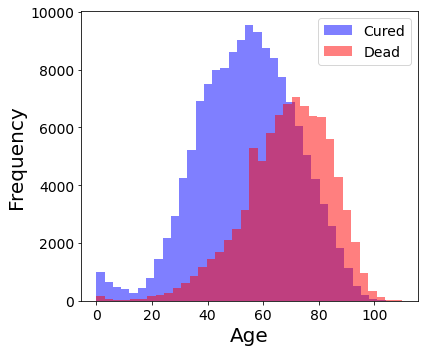

In [71]:
# extremes


print(min(df['NU_IDADE_N']))
print(max(df['NU_IDADE_N']))

# plotting graphic

plt.figure(figsize=(6,5))
plt.hist(df['NU_IDADE_N'][df['EVOLUCAO']==1], 36, color='blue', alpha=0.5, label ='Cured')
plt.hist(df['NU_IDADE_N'][df['EVOLUCAO']==2], 36, color='red' , alpha=0.5, label = 'Dead')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tight_layout()
plt.savefig('age_distribution.pdf')
plt.show()